# Trabajo en clases 17-12-2024
Nombre: Rossy Armendariz

1. Ejecutar el cógido par un corpus mas grande y en ingles.

    a. Especificar las etapas del Bert.
    
    b. Crear las graficas de representación vectorial.

Este nuevo corpus contendrá más frases y estará en inglés.

    a. Especificar las etapas del Bert.

Las etapas del bert se detallan a continuación:
1. Entrada: Tokenización y Vectorización
2. Embedding de Entrada
3. Cálculo de la Atención (Self-Attention)
4. Salida Ponderada

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Definir el corpus mas grande y en inglés 
corpus = [
    "The cat plays with a red ball at home.",
    "The girl eats a red apple sitting at the table.",
    "A dog runs quickly behind a car on the street.",
    "The sun rises early while birds sing very loud.",
    "The boy reads a blue book quietly in the living room.",
    "Children are playing happily in the green park with their toys.",
    "The teacher explains the lesson to students in the large classroom.",
    "The wind blows strongly as leaves fall from the trees in autumn.",
    "A baker prepares fresh bread every morning in the small bakery.",
    "The doctor advises the patient to rest for three days and drink water."
]

1. Entrada: Tokenización y Vectorización

In [9]:

countVectorizer = CountVectorizer()
X = countVectorizer.fit_transform(corpus)

# Mostrar los datos
print("Vocabulario:", countVectorizer.get_feature_names_out())
print("Dimensión de X:", X.shape)
print("Representación vectorial:\n", X.toarray())

Vocabulario: ['advises' 'and' 'apple' 'are' 'as' 'at' 'autumn' 'baker' 'bakery' 'ball'
 'behind' 'birds' 'blows' 'blue' 'book' 'boy' 'bread' 'car' 'cat'
 'children' 'classroom' 'days' 'doctor' 'dog' 'drink' 'early' 'eats'
 'every' 'explains' 'fall' 'for' 'fresh' 'from' 'girl' 'green' 'happily'
 'home' 'in' 'large' 'leaves' 'lesson' 'living' 'loud' 'morning' 'on'
 'park' 'patient' 'playing' 'plays' 'prepares' 'quickly' 'quietly' 'reads'
 'red' 'rest' 'rises' 'room' 'runs' 'sing' 'sitting' 'small' 'street'
 'strongly' 'students' 'sun' 'table' 'teacher' 'the' 'their' 'three' 'to'
 'toys' 'trees' 'very' 'water' 'while' 'wind' 'with']
Dimensión de X: (10, 78)
Representación vectorial:
 [[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 1]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 2 0 0 0 0

2. Embedding de Entrada

In [10]:
import numpy as np

# Dimensión de la clave (dk)
dk = X.shape[1]  

# Crear una matriz aleatoria con dimensiones basadas en X.shape
wq = np.random.rand(dk, dk)
wk = np.random.rand(dk, dk)
wv = np.random.rand(dk, dk)

# Realizar el producto punto
q = np.dot(X.toarray(), wq)
k = np.dot(X.toarray(), wk)
v = np.dot(X.toarray(), wv)

print("Matriz Wq:\n", wq)
print("Dimensión de wq:", wq.shape)

print("Resultado q:\n", q)
print("Dimensión de q:", q.shape)

Matriz Wq:
 [[0.38847779 0.51333893 0.76510451 ... 0.29898538 0.64062077 0.39469588]
 [0.46167184 0.93606319 0.54776626 ... 0.59318222 0.24775297 0.93440605]
 [0.74957708 0.42612247 0.47378795 ... 0.77642945 0.09330967 0.68457371]
 ...
 [0.99448633 0.33921225 0.61140422 ... 0.10900532 0.29560318 0.02311945]
 [0.47270074 0.61301978 0.21115487 ... 0.16571761 0.55181495 0.81663905]
 [0.70602013 0.68308119 0.19527441 ... 0.50782876 0.37686961 0.99709953]]
Dimensión de wq: (78, 78)
Resultado q:
 [[3.64419328 4.41828369 2.12951152 5.0877689  2.33040927 2.16917679
  4.5510929  2.59953541 4.05742523 2.87559468 3.0903183  4.68711468
  3.81421696 2.73166376 5.15037477 2.98938712 3.66188561 3.746813
  5.65548291 2.03654885 4.67404504 4.04758921 3.65406984 4.6349904
  4.65210957 2.6903411  4.14681547 3.70739868 5.50243951 5.41333682
  4.22144452 5.97184212 5.12680718 5.5183771  3.77642002 4.14449596
  3.66838549 3.75895136 3.87514845 2.80103387 5.60323668 3.36194588
  4.68432502 3.72390801 3.88742

3. Cálculo de la Atención (Self-Attention)

In [11]:
# Scores
scores = (np.dot(q, k.T))/ (np.sqrt(dk))

# Attention weights softmax para obtener los pesos
attention_weights = np.exp(scores)/np.sum(np.exp(scores))

# Ponderar V con los attention_weights
output = np.dot(attention_weights, v)

print("Scores:\n", scores)
print("Attention Weights:\n", attention_weights)
print("Attention Output:\n", output)

Scores:
 [[137.75229108 161.06988722 135.43265413 155.08291734 173.41641964
  193.97308153 191.28568355 209.3144603  172.90872848 224.31972227]
 [160.29262853 185.26220408 155.80373878 180.10769266 201.14878598
  224.99154705 221.1148137  243.2621322  199.8329735  261.33924628]
 [139.55313236 162.69597511 136.28885996 157.74405285 175.00300313
  197.23685024 194.07109675 213.80071263 174.53572237 229.78618975]
 [158.49016712 183.80142098 154.25944583 179.64764063 197.8177786
  221.69516563 221.37862453 242.27185208 196.52425112 259.30826293]
 [182.69506025 211.48682308 176.6624467  204.48771945 228.48157926
  255.00151092 251.7385249  277.64058084 228.0743489  296.53917978]
 [191.99746761 224.38722632 188.82636531 217.00417209 242.11874481
  272.04982426 268.59124073 296.04083231 242.32266583 315.05493913]
 [191.71019041 221.96894656 184.72170471 213.17475445 238.65487241
  268.50977515 263.79814815 289.12086316 238.01889323 310.53557132]
 [215.41469256 249.05647242 207.09024995 240.44

4. Salida Ponderada

In [12]:
def self_attention(q, k, v):
    scores = (np.dot(q, k.T))/ (np.sqrt(k.shape[1]))
    # Attention weights softmax para obtener los pesos
    attention_weights = np.exp(scores)/np.sum(np.exp(scores))
    # Ponderar V con los attention_weights
    output = np.dot(attention_weights, v)

    b. Crear las graficas de representación vectorial.

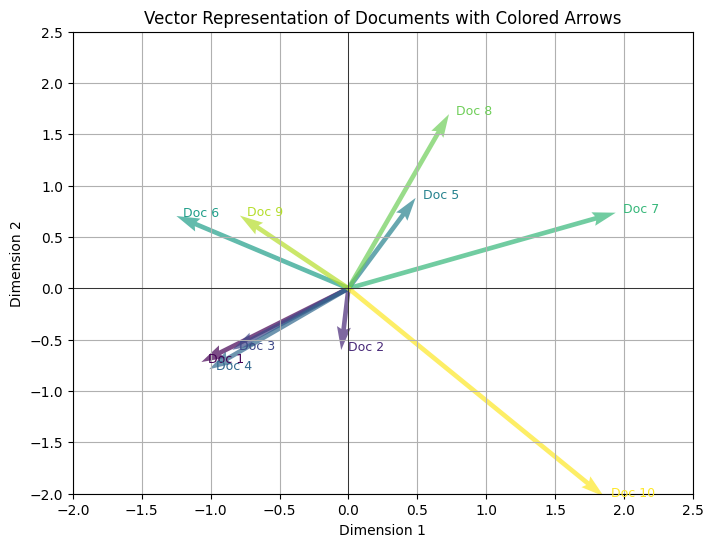

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir a 2 dimensiones con PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualización de vectores 
colors = plt.cm.viridis(np.linspace(0, 1, X_pca.shape[0]))  # Generar colores únicos

plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(X_pca):
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color=colors[i], alpha=0.7)
    plt.text(x + 0.05, y, f"Doc {i+1}", fontsize=9, color=colors[i])

# Configurar la gráfica
plt.title("Vector Representation of Documents with Colored Arrows")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.xlim(-2, 2.5)
plt.ylim(-2, 2.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()